In [1]:
# Data_EraE

In [1]:
import os
import pandas as pd
import uproot
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import ROOT


Welcome to JupyROOT 6.30/02


In [2]:
data = [
    ("../../outputfiles/hhbbgg_analyzer-v2-trees.root", "/Data_EraF/preselection")
]

In [3]:
keys  = ['diphoton_mass', 'dibjet_mass', 'bbgg_mass']

In [4]:
# Load DataFrames
dfs = {}

# Load lowX files
for file, key in data:
    try:
        with uproot.open(file) as f:
            dfs[key] = f[key].arrays(keys, library="pd")
    except Exception as e:
        print(f"Error loading {file} with key {key}: {e}")


In [5]:
data_eraF_preselection = dfs["/Data_EraF/preselection"]

In [6]:
# Define each variable separately
diphoton_mass = data_eraF_preselection["diphoton_mass"]
dibjet_mass = data_eraF_preselection["dibjet_mass"]
bbgg_mass = data_eraF_preselection["bbgg_mass"]

In [7]:
bbgg_mass

0         214.188503
1         200.650990
2         260.601409
3         238.065632
4         589.839402
             ...    
115165    361.040523
115166    272.652702
115167    488.187790
115168    265.935479
115169    356.080004
Name: bbgg_mass, Length: 115170, dtype: float64

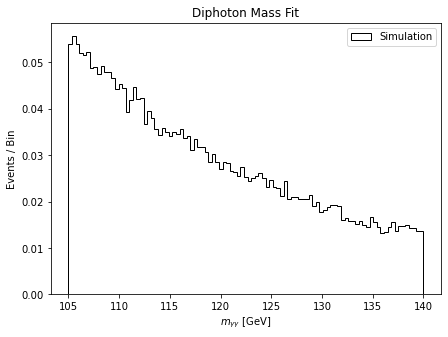

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uproot
import awkward as ak
from vector import Array as awk


# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Plot
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass, bins=bins, density=True, histtype="step", color="black", label="Simulation")
# plt.plot(x_fit, y_fit, color="blue", label="Gaussian Fit")
# plt.axvspan(fwhm_low, fwhm_high, color='gray', alpha=0.5, label="FWHM Region")

plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit")
plt.show()

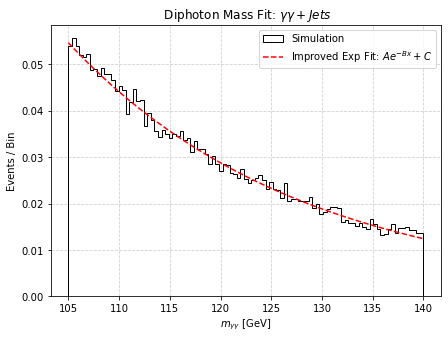

Fitted Parameters: A = 5.201, B = 0.04350, C = 0.00065


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define improved exponential function with an additional constant
def exp_fit(x, A, B, C):
    return A * np.exp(-B * x) + C

# Define the fit range
fit_mask = (bin_centers > 110) & (bin_centers < 135)  # Focus on mid-range

# Perform fit using selected range
params, covariance = curve_fit(exp_fit, bin_centers[fit_mask], hist[fit_mask], p0=[1.2, 0.01, 0])

# Generate fitted curve
x_fit = np.linspace(105, 140, 1000)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and improved fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Improved Exp Fit: $A e^{-Bx} + C$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title(" Diphoton Mass Fit: $\gamma\gamma+Jets$")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.png")
plt.show()
# Print improved fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}, C = {params[2]:.5f}")


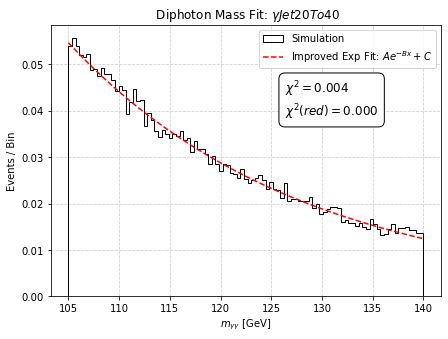

Fitted Parameters: A = 5.201, B = 0.04350, C = 0.00065
Chi-squared: 0.004, Degrees of Freedom: 68, Reduced Chi-squared: 0.000


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define improved exponential function with an additional constant
def exp_fit(x, A, B, C):
    return A * np.exp(-B * x) + C

# Define the fit range
fit_mask = (bin_centers > 110) & (bin_centers < 135)  # Focus on mid-range

# Perform fit using selected range
params, covariance = curve_fit(exp_fit, bin_centers[fit_mask], hist[fit_mask], p0=[0.08, 0.01, 0])

# Generate fitted curve
x_fit = np.linspace(105, 140, 1000)
y_fit = exp_fit(x_fit, *params)

# Calculate chi-squared
y_fit_data = exp_fit(bin_centers[fit_mask], *params)
residuals = hist[fit_mask] - y_fit_data
errors = np.sqrt(hist[fit_mask])  # Assuming Poisson errors (sqrt of counts)

# Avoid division by zero in case of empty bins
errors[errors == 0] = 1  

chi2 = np.sum((residuals / errors) ** 2)
ndof = len(hist[fit_mask]) - len(params)  # Degrees of freedom

chi2_red = chi2 / ndof if ndof > 0 else np.nan  # Avoid division by zero

# Plot histogram and improved fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Improved Exp Fit: $A e^{-Bx} + C$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title(r" Diphoton Mass Fit: $\gamma Jet20To40$")
plt.grid(True, linestyle="--", alpha=0.6)

# Add chi-squared and reduced chi-squared to the plot
plt.text(0.6, 0.8, f"$\chi^2 = {chi2:.3f}$\n$\chi^2(red) = {chi2_red:.3f}$", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Show the plot
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet20To40.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet20To40.png")
plt.show()

# Print improved fit parameters and chi-squared
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}, C = {params[2]:.5f}")
print(f"Chi-squared: {chi2:.3f}, Degrees of Freedom: {ndof}, Reduced Chi-squared: {chi2_red:.3f}")


## Filling the `ROOT` file

In [11]:
# Save the fitted shape (histogram) to a ROOT file
root_file_path = "HHbbgg_XYH.root"

# Create a new ROOT file
root_file = ROOT.TFile(root_file_path, "UPDATE")

# Create a histogram for the fitted function
hist_fit = ROOT.TH1F("data_obs", "Fitted exp Shape", len(bin_edges)-1, bin_edges)

# Fill the histogram with the fitted function values
for i in range(len(bin_centers)):
    hist_fit.SetBinContent(i+1, y_fit[i])

# Save the histogram to the ROOT file
hist_fit.Write()

# Close the ROOT file
root_file.Close()

print(f"Fitted histogram saved to {root_file_path}")



Fitted histogram saved to HHbbgg_XYH.root


## Fitting as the Rooworkspace.
Not trying these methods with `HHbbgg_XYH.root`. Planning to save all of the files and then use datacard. 

In [17]:
import ROOT
import numpy as np

# Use your existing bin_edges and y_fit from the fit
# If not defined, re-define them here accordingly
bins = np.linspace(105, 140, 100)
bin_edges = bins
bin_centers = 0.5 * (bins[:-1] + bins[1:])
A, B, C = 5.201, 0.04350, 0.00065  # Your fit parameters
y_fit = A * np.exp(-B * bin_centers) + C

# Define observable
mass = ROOT.RooRealVar("diphoton_mass", "diphoton_mass", 105, 140)

# Create TH1F
hist_fit = ROOT.TH1F("data_obs", "Fitted exp Shape", len(bin_edges)-1, bin_edges)
for i in range(len(bin_centers)):
    hist_fit.SetBinContent(i+1, y_fit[i])

# Convert to RooDataHist
roo_datahist = ROOT.RooDataHist("data_obs", "data_obs", ROOT.RooArgList(mass), hist_fit)

# Create workspace
workspace = ROOT.RooWorkspace("w", "workspace")
getattr(workspace, "import")(roo_datahist)

# Write to file
fout = ROOT.TFile("fitting_results_data.root", "RECREATE")
workspace.Write("w")  # << THIS writes the workspace as 'w'
fout.Close()

print("✅ Workspace 'w' with 'data_obs' saved in fitting_results_data.root")


✅ Workspace 'w' with 'data_obs' saved in fitting_results_data.root
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data_obs
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::diphoton_mass


Warning in <TROOT::Append>: Replacing existing TH1: data_obs (Potential memory leak).
